# TOC
PREP    
Importing libraries and data
Data prep for time series analysis
   
DATA SMOOTHING   
Data smoothing & analysis   

DECOMPOSITION   
Decomposition graphing & analysis 

STATIONARITY   
Plotting rolling statistics & observations   
Conducting Dickey-Fuller test & observations   
Autocorrelation & observations   
Setting up differenced dataset; re-running stationarity steps & analysis

### PREP

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
plt.style.use('bmh')

In [4]:
# Importing data

path = r'C:\Users\Ryzen RGB Madness!!!\Iowa Liquor Sales Analysis'

In [5]:
liquor_data_complete = pd.read_pickle(os.path.join(path, '01 - Data', 'Cleaned', 'iowa_sales_location_population.pkl'))

In [6]:
liquor_data_complete.shape

(12537543, 26)

In [7]:
liquor_data_complete.columns

Index(['invoice_number', 'date', 'store_number', 'store_name', 'address',
       'city', 'zip_code', 'latitude', 'longitude', 'county_fips', 'county',
       'population', 'category', 'category_name', 'vendor_number',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale_dollars', 'volume_sold_liters',
       'volume_sold_gallons'],
      dtype='object')

In [8]:
# Data prep - setting date as index column

liquor_data_timedata = liquor_data_complete.set_index('date')

In [9]:
liquor_data_timedata.head()

,invoice_number,store_number,store_name,address,city,zip_code,latitude,longitude,county_fips,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
date,,,,,,,,,,,,,,,,,,,,,
2018-09-04,INV-14210900001,4617,LICKETY LIQUOR,2501 HUBBELL AVE,DES MOINES,50317,41.607739,-93.570182,19153,Polk,...,36904,MCCORMICK VODKA PET,24,375,1.80,2.70,48,129.60,18.0,4.75
2019-01-08,INV-16812800013,5151,IDA LIQUOR,500 HWY 175,IDA GROVE,51445,42.350164,-95.489235,19093,Ida,...,38176,TITOS HANDMADE VODKA,12,750,9.64,14.46,12,173.52,9.0,2.37
2019-03-12,INV-18087600031,5151,IDA LIQUOR,500 HWY 175,IDA GROVE,51445,42.350164,-95.489235,19093,Ida,...,27102,TEMPLETON 4YR RYE,6,750,18.09,27.14,6,162.84,4.5,1.18
2018-10-23,INV-15226900023,5151,IDA LIQUOR,500 HWY 175,IDA GROVE,51445,42.350164,-95.489235,19093,Ida,...,35918,FIVE O'CLOCK VODKA,6,1750,7.20,10.80,6,64.80,10.5,2.77
2019-02-01,INV-17301000008,2445,RUBACK'S FOOD CENTER,504 SOUTH HIGHWAY,OAKLAND,51560,41.309302,-95.396649,19155,Pottawattamie,...,36306,HAWKEYE VODKA,12,750,3.34,5.01,12,60.12,9.0,2.37


In [10]:
import matplotlib.dates as mdates

In [11]:
%matplotlib inline

In [12]:
# Removing unnecessary columns for checking stationarity

liquor_data_td_dollars = liquor_data_timedata.drop(columns =['invoice_number', 'store_number', 'store_name', 'address', 'city',
       'zip_code', 'latitude', 'longitude', 'county_fips', 'county',
       'population', 'category', 'category_name', 'vendor_number',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'volume_sold_liters',
       'volume_sold_gallons'])

In [13]:
liquor_data_td_dollars.head()

,sale_dollars
date,
2018-09-04,129.60
2019-01-08,173.52
2019-03-12,162.84
2018-10-23,64.80
2019-02-01,60.12


In [14]:
liquor_data_td_dollars.shape

(12537543, 1)

In [15]:
liquor_data_grouped_month = liquor_data_td_dollars.groupby(by=pd.Grouper(level='date', freq='M', sort=True)).sum().reset_index() 
liquor_data_grouped_month.set_index(keys=['date'], drop=True, inplace=True)

In [16]:
liquor_data_grouped_month.head()

,sale_dollars
date,
2018-01-31,22606775.80
2018-02-28,22861176.42
2018-03-31,24873041.23
2018-04-30,26214746.69
2018-05-31,30180818.39


In [17]:
liquor_data_grouped_month.shape

(60, 1)

In [18]:
import matplotlib.ticker as ticker

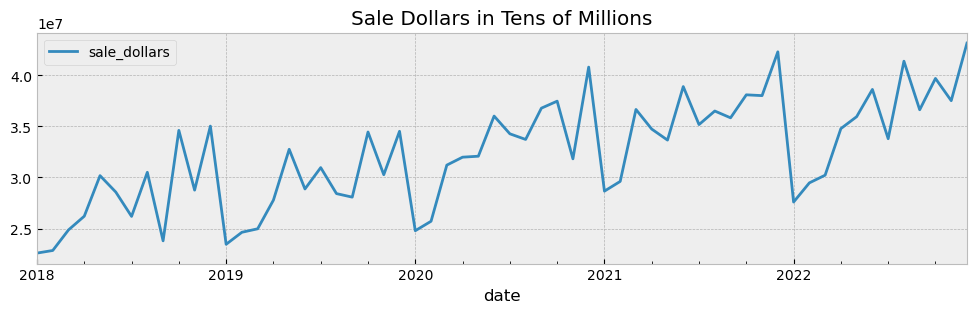

In [19]:
# Plotting raw grouped data

liquor_data_grouped_month.plot(figsize=(12,3));
plt.title('Sale Dollars in Tens of Millions');

ANALYSIS   
The data trends upward and also has a repeating seasonal pattern. 

### DATA SMOOTHING

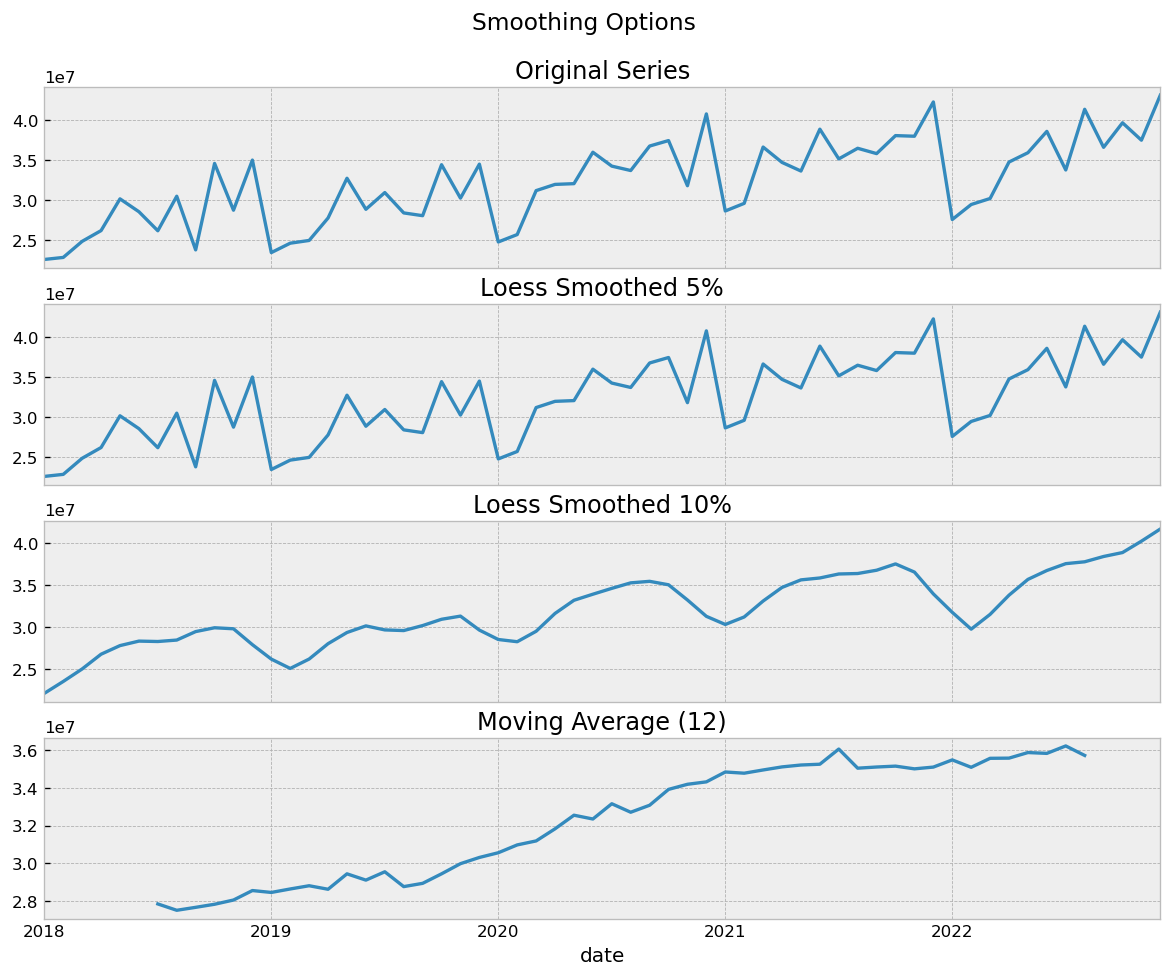

In [20]:
# Data smoothing

from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

liquor_ma = liquor_data_grouped_month['sale_dollars'].rolling(12, center=True, closed='both').mean()
liquor_loess_5 = pd.DataFrame(lowess(liquor_data_grouped_month['sale_dollars'], np.arange(len(liquor_data_grouped_month['sale_dollars'])), frac=0.05)[:, 1], index=liquor_data_grouped_month.index, columns=['sale_dollars'])
liquor_loess_10 = pd.DataFrame(lowess(liquor_data_grouped_month['sale_dollars'], np.arange(len(liquor_data_grouped_month['sale_dollars'])), frac=0.10)[:, 1], index=liquor_data_grouped_month.index, columns=['sale_dollars'])

fig, axes = plt.subplots(4,1, figsize=(12, 9), sharex=True, dpi=120)
liquor_data_grouped_month['sale_dollars'].plot(ax=axes[0], title='Original Series')
liquor_loess_5['sale_dollars'].plot(ax=axes[1], title='Loess Smoothed 5%')
liquor_loess_10['sale_dollars'].plot(ax=axes[2], title='Loess Smoothed 10%')
liquor_ma.plot(ax=axes[3], title='Moving Average (12)')
fig.suptitle('Smoothing Options', y=0.95, fontsize=14)
plt.show()

ANALYSIS   
The moving average shows the trendline even more dramatically than the raw data itself. The Loess Smoothed 5% is very similar to the raw data, while the Loess Smoothed 10% shows the progression with fewer dramatic changes.    

These graphs answer two of my questions:   
1. "Have sales recovered from covid?" (Answer: sales have been on an upward swing since before covid, and were not slowed down by the pandemic - outside factors there will include how much of a lockdown Iowa had, and if that differed from county to county)
2. "Are there seasonal factors to consider regarding sales?" (Answer: Yes. Sales have regular seasonal spikes in mid-summer and around the holidays, hitting their lowest point just after the new year.)

While I did simple data smoothing here, for my forecasting I will be taking into account the trend and seasonality of my dataset and using the Holt-Winters forecasting model. 

### DECOMPOSITION

In [21]:
# Time-series analysis: Decomposition

decomposition = sm.tsa.seasonal_decompose(liquor_loess_5, model='additive', period=12)

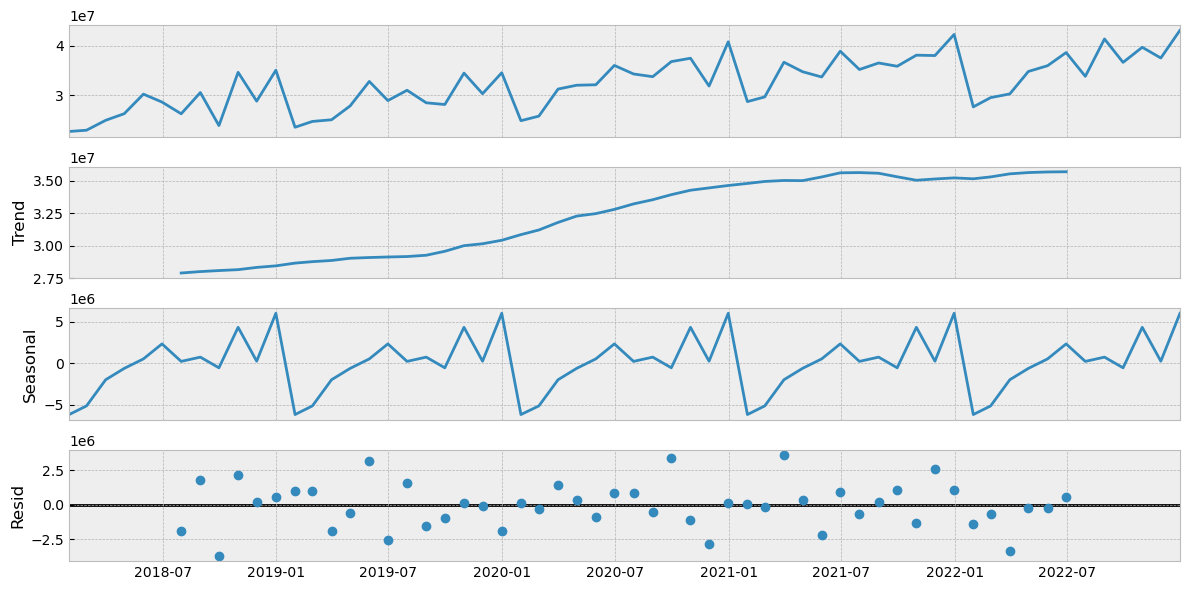

In [22]:
plt.rc("figure",figsize=(12,6))
decomposition.plot()
fig.tight_layout()
plt.show()

ANALYSIS   
There is a very definite seasonal pattern, much more obvious here. High buying in the tail end of the year, followed by a steep drop in purchasing after the new year (because everyone got their partying out over Christmas and New Year's Eve). It then picks up in time for summer (I'd guess buying for the 4th of July) before tapering off prior to the holiday spike. 

This pattern was clear on the straight mapping of the data, and becomes even more obvious here. However, I will still be mapping the rolling stats on the raw data.

### STATIONARITY: ROLLING STATISTICS

In [23]:
# Plotting rolling statistics

liquor_data_grouped_month['z_data'] = (liquor_data_grouped_month['sale_dollars'] - liquor_data_grouped_month['sale_dollars'].rolling(window=12).mean()) / liquor_data_grouped_month['sale_dollars'].rolling(window=12).std()
liquor_data_grouped_month['zp_data'] = liquor_data_grouped_month['z_data'] - liquor_data_grouped_month['z_data'].shift(12)

In [24]:
liquor_data_grouped_month.head()

,sale_dollars,z_data,zp_data
date,,,
2018-01-31,22606775.80,NaN,NaN
2018-02-28,22861176.42,NaN,NaN
2018-03-31,24873041.23,NaN,NaN
2018-04-30,26214746.69,NaN,NaN
2018-05-31,30180818.39,NaN,NaN


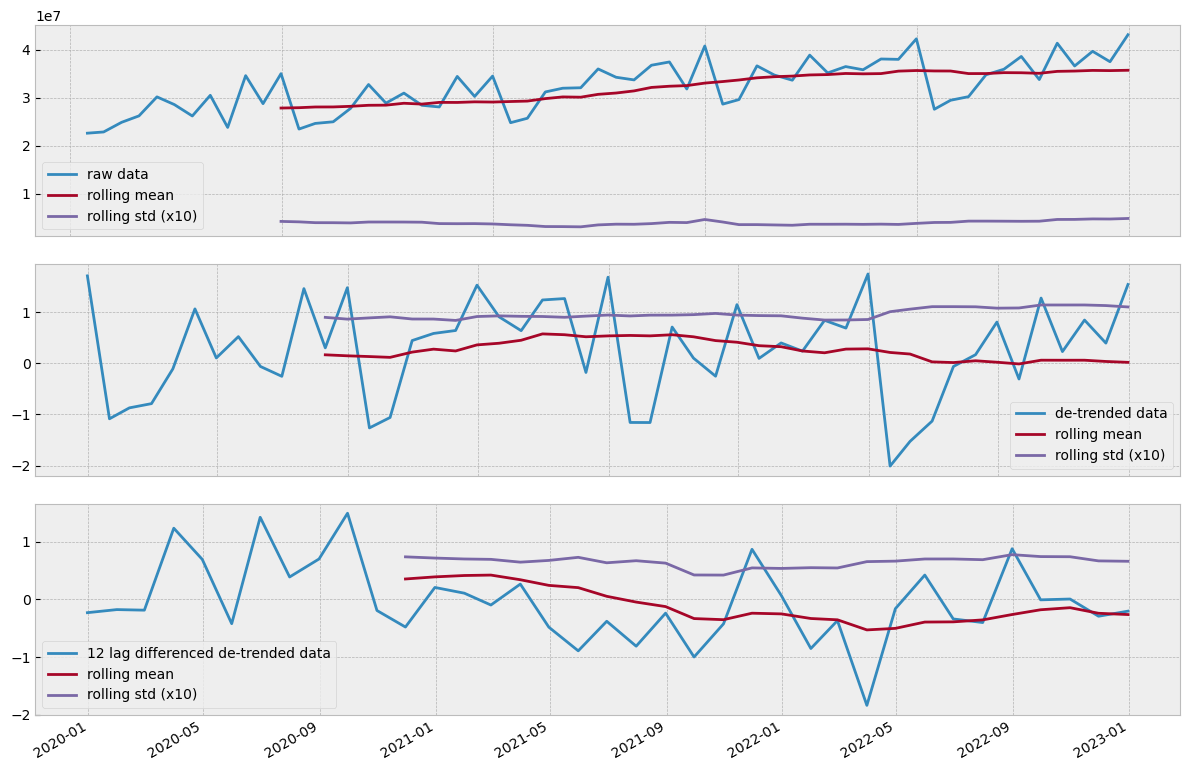

In [25]:
fig, ax = plt.subplots(3,figsize=(12, 9))
ax[0].plot(liquor_data_grouped_month.index, liquor_data_grouped_month['sale_dollars'], label='raw data')
ax[0].plot(liquor_data_grouped_month['sale_dollars'].rolling(window=12).mean(), label="rolling mean");
ax[0].plot(liquor_data_grouped_month['sale_dollars'].rolling(window=12).std(), label="rolling std (x10)");
ax[0].legend()

ax[1].plot(liquor_data_grouped_month.index, liquor_data_grouped_month['z_data'], label="de-trended data")
ax[1].plot(liquor_data_grouped_month['z_data'].rolling(window=12).mean(), label="rolling mean");
ax[1].plot(liquor_data_grouped_month['z_data'].rolling(window=12).std(), label="rolling std (x10)");
ax[1].legend()

ax[2].plot(liquor_data_grouped_month.index, liquor_data_grouped_month['zp_data'], label="12 lag differenced de-trended data")
ax[2].plot(liquor_data_grouped_month['zp_data'].rolling(window=12).mean(), label="rolling mean");
ax[2].plot(liquor_data_grouped_month['zp_data'].rolling(window=12).std(), label="rolling std (x10)");
ax[2].legend()

plt.tight_layout()
fig.autofmt_xdate()

ANALYSIS   
There's movement upward, for sure. Looking at the data monthly definitely shows that there's a trend, even though the rolling mean doesn't show a LOT of a trend. 

### STATIONARITY: DICKEY-FULLER

In [26]:
# Running Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller

print(" > Is the data stationary ?")
dftest = adfuller(liquor_data_grouped_month['sale_dollars'], autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the de-trended data stationary ?")
dftest = adfuller(liquor_data_grouped_month['z_data'].dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the 12-lag differenced de-trended data stationary ?")
dftest = adfuller(liquor_data_grouped_month['zp_data'].dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

 > Is the data stationary ?
Test statistic = -0.849
P-value = 0.804
Critical values :
	1%: -3.5745892596209488 - The data is not stationary with 99% confidence
	5%: -2.9239543084490744 - The data is not stationary with 95% confidence
	10%: -2.6000391840277777 - The data is not stationary with 90% confidence

 > Is the de-trended data stationary ?
Test statistic = -0.531
P-value = 0.886
Critical values :
	1%: -3.6209175221605827 - The data is not stationary with 99% confidence
	5%: -2.9435394610388332 - The data is not stationary with 95% confidence
	10%: -2.6104002410518627 - The data is not stationary with 90% confidence

 > Is the 12-lag differenced de-trended data stationary ?
Test statistic = -4.685
P-value = 0.000
Critical values :
	1%: -3.626651907578875 - The data is  stationary with 99% confidence
	5%: -2.9459512825788754 - The data is  stationary with 95% confidence
	10%: -2.6116707716049383 - The data is  stationary with 90% confidence


ANALYSIS   
With the monthly data, the test statistic is still under the p-value, but it doesn't meet the critical values the way that it did with the daily data. This coupled with the results of the rolling statistics are making me lean much more toward doing a differenced dataset to look at those results. 

### STATIONARITY: AUTOCORRELATION

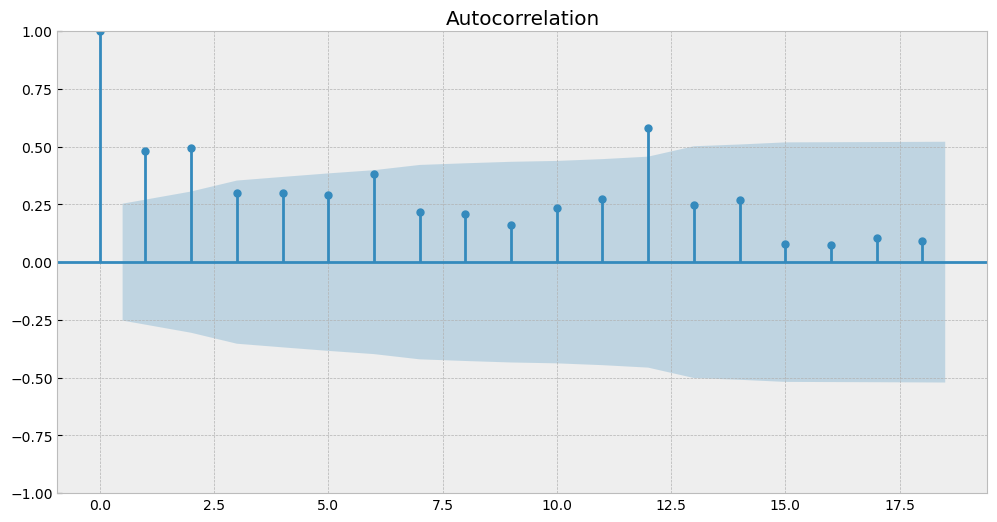

In [27]:
# Autocorrelation graph

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(liquor_data_grouped_month['sale_dollars'])
plt.show()

ANALYSIS   
With the monthly data, there is much less autocorrelation - only 4 points outside the blue confidence zone. Given this, I don't see a need to re-graph everything else like I did with the daily data.  

### DIFFERENCING & RE-TESTING

In [28]:
# Differencing the time-series data

liquor_data_grouped_diff = liquor_data_grouped_month - liquor_data_grouped_month.shift(1)

In [29]:
liquor_data_grouped_diff = liquor_data_grouped_diff.drop(columns=['z_data', 'zp_data'])

In [30]:
liquor_data_grouped_diff.isnull().sum()

sale_dollars    1
dtype: int64

In [31]:
liquor_data_grouped_diff.shape

(60, 1)

In [32]:
liquor_data_grouped_diff = liquor_data_grouped_diff.dropna()

In [33]:
liquor_data_grouped_diff.shape

(59, 1)

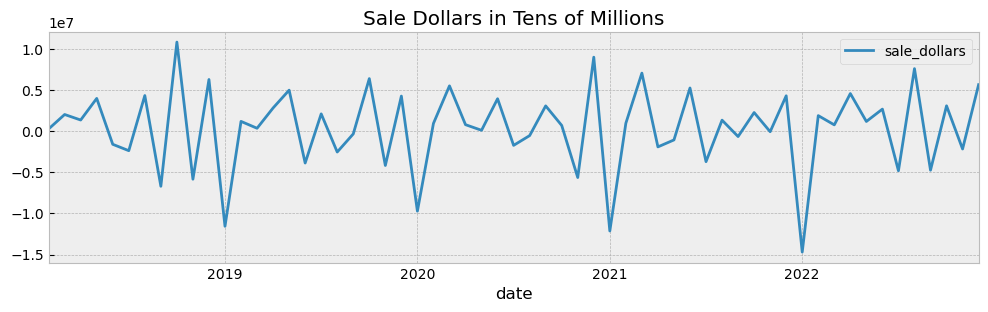

In [34]:
liquor_data_grouped_diff.plot(figsize=(12,3));
plt.title('Sale Dollars in Tens of Millions');

ANALYSIS   
The seasonal spikes are much clearer here with the differenced data. 4 spikes in 2018, 4 in 2019, 4 in 2020, and 5 in both 2021 and 2022. Applying month lines over these, I would not be surprised to find most of them precede Valentine's Day, the 4th of July, Labor Day, and the end-of-year holidays. 

In [35]:
# Running Dickey-Fuller test on differenced data

print(" > Is the data stationary ?")
dftest = adfuller(liquor_data_grouped_diff['sale_dollars'], autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

 > Is the data stationary ?
Test statistic = -8.172
P-value = 0.000
Critical values :
	1%: -3.5745892596209488 - The data is  stationary with 99% confidence
	5%: -2.9239543084490744 - The data is  stationary with 95% confidence
	10%: -2.6000391840277777 - The data is  stationary with 90% confidence


ANALYSIS   
As expected, the differenced data is far below the critical values, nearly reaching the point of the de-trended differenced data calculated for the rolling statistics graphs. 

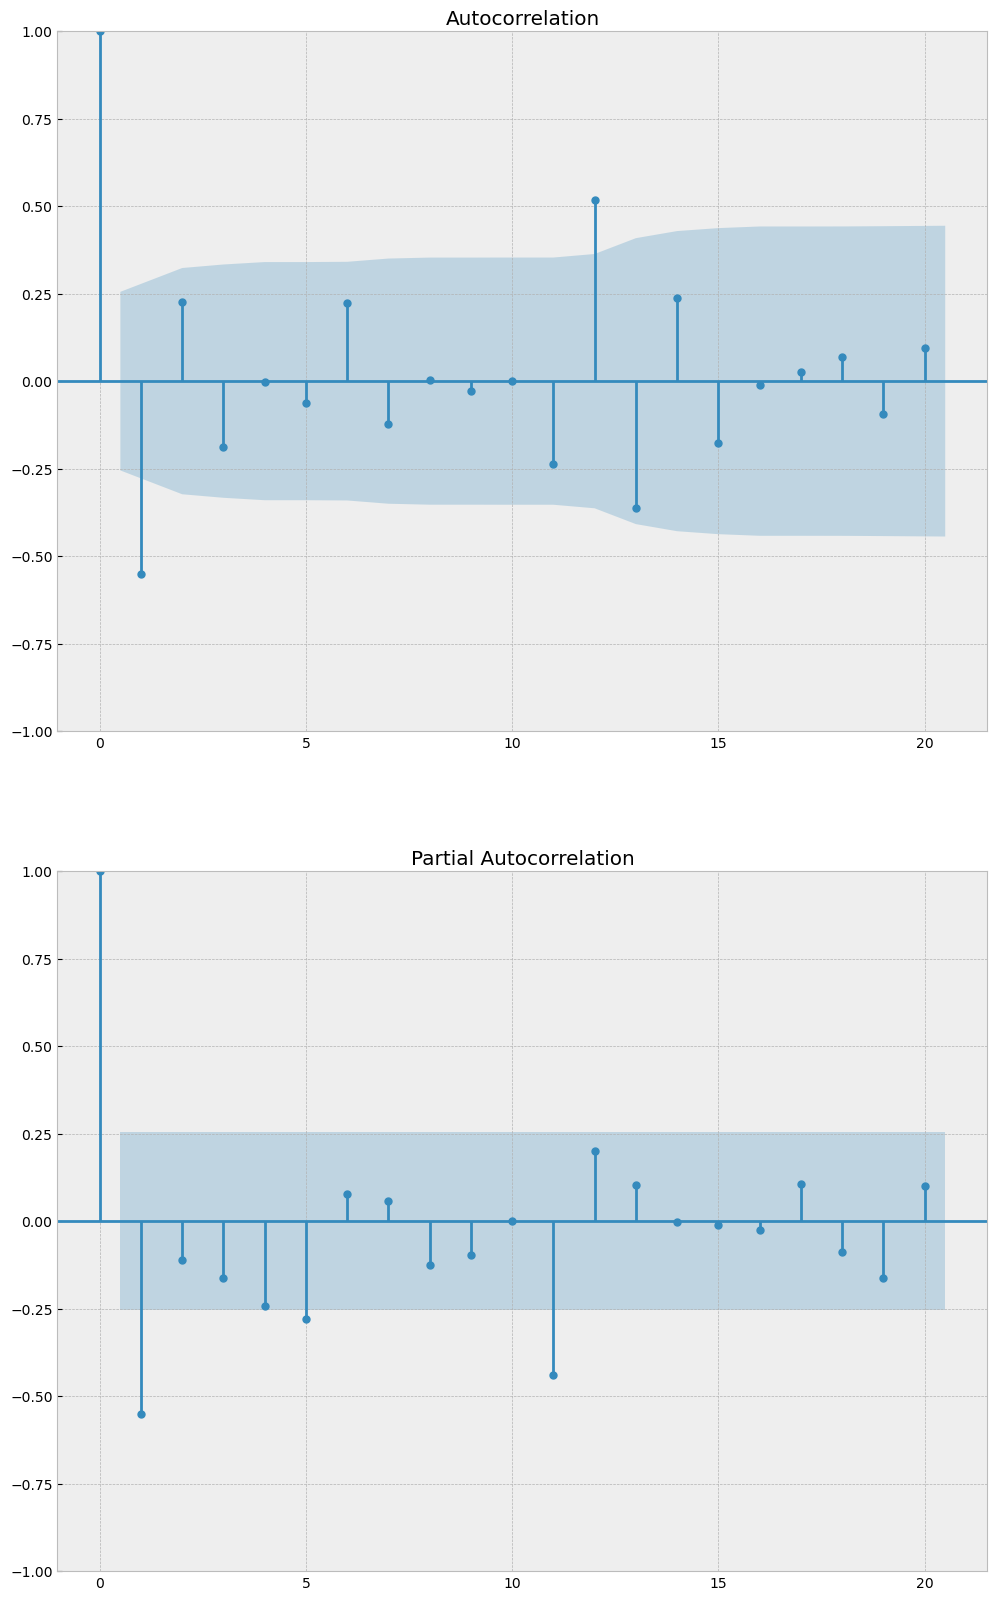

In [36]:
# Autocorrelation of differenced data 

fig, ax = plt.subplots(2, figsize=(12,20))
ax[0] = plot_acf(liquor_data_grouped_diff['sale_dollars'].dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(liquor_data_grouped_diff['sale_dollars'].dropna(), ax=ax[1], lags=20)

ANALYSIS   
There isn't as much of a difference here from the original data - still a very few spikes outside the blue confidence zone, certainly few enough to proceed with the data. 